In [7]:
import random
import skimage as sk
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import util
import imageio
import warnings
import numpy 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from scipy import ndimage
warnings.filterwarnings("ignore")

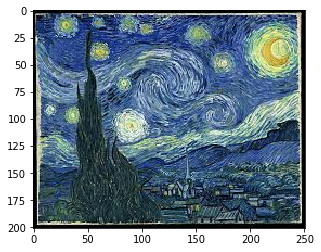

In [8]:
starry = cv2.imread('starry.jpeg')
starry_rgb = cv2.cvtColor(starry, cv2.COLOR_BGR2RGB)
imshow(starry_rgb)

In [9]:
np.random.normal(0,1,10)

array([-0.91085533, -0.36784822,  0.80200425, -1.02953541,  1.72777919,
       -0.96769792,  1.08921381, -2.39824574,  0.62141761, -0.80374331])

In [10]:

########### Gaussian Noise ##########

def noisy_gauss(img,mean,std):
    noisy_img = cv2.add(img , np.random.normal(mean, std, img.shape).astype(np.uint8))   
    return noisy_img

(201, 251, 3)
151353


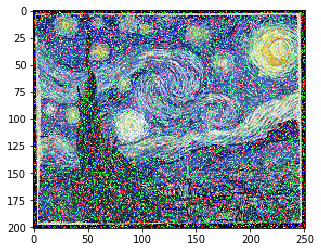

In [17]:
mean = 0.0   
std = 1.0
noisy_gauss_image =noisy_gauss(starry_rgb,mean,std)
imshow(noisy_gauss_image)
print (starry_rgb.shape)
print (starry_rgb.size)

In [12]:

########### Salt and Pepper Noise ##########


def noisy_sp(img,s_vs_p,amount):
    out = np.copy(img)
    # Salt mode
    num_salt = np.ceil(amount * img.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in img.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in img.shape]
    out[coords] = 0
    return out

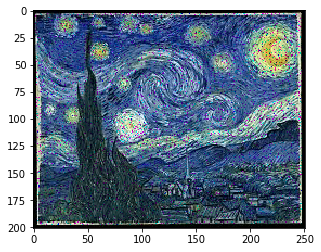

In [13]:
s_vs_p = 0.5
amount = 0.05
noisy_sp_image =noisy_sp(starry_rgb,s_vs_p,amount)
imshow(noisy_sp_image)

In [14]:
##### Changing Lightning condition #####



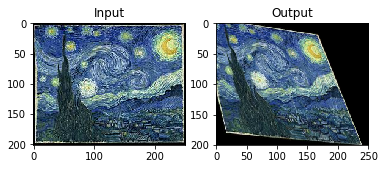

In [15]:

######### perspective transform on an image #######

def perspective_transform(img):
    
    #[(0, 0), (256, 0), (256, 256), (0, 256)],
    pts1 = np.float32([[56,65],[243,52],[28,230],[180,245]])
    pts2 = np.float32([[30,50],[180,60],[50,220],[200,250]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(250,200))  # (cols,rows)

    plt.subplot(121),plt.imshow(img),plt.title('Input')
    plt.subplot(122),plt.imshow(dst),plt.title('Output')
    plt.show()

perspective_transform(starry_rgb)